In [1]:
pip install yfinance pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


In [3]:
# Scarica i dati storici di Bitcoin (BTC-USD) da Yahoo Finance con yfinance
bitcoin_data = yf.download('BTC-USD', start='2010-01-01')
bitcoin_data = bitcoin_data[['Close', 'Volume']].copy() 
bitcoin_data.rename(columns={'Close': 'BTC_Price', 'Volume': 'BTC_Volume'}, inplace=True)

# Visualizza i primi dati
print(bitcoin_data.head())



[*********************100%%**********************]  1 of 1 completed

             BTC_Price  BTC_Volume
Date                              
2014-09-17  457.334015    21056800
2014-09-18  424.440002    34483200
2014-09-19  394.795990    37919700
2014-09-20  408.903992    36863600
2014-09-21  398.821014    26580100


In [4]:
# Funzione per ottenere i dati del CPI dalla FRED usando pandas_datareader
def get_cpi_data():
    cpi = pdr.DataReader('CPIAUCSL', 'fred', start='2010-01-01')
    return cpi

# Ottieni i dati del CPI
cpi_data = get_cpi_data()

# Visualizza i primi dati
print(cpi_data.head())


            CPIAUCSL
DATE                
2010-01-01   217.488
2010-02-01   217.281
2010-03-01   217.353
2010-04-01   217.403
2010-05-01   217.290


In [5]:
# Unione dei dati di Bitcoin e CPI
bitcoin_cpi_data = bitcoin_data.join(cpi_data, how='inner')

# Rimozione dei valori mancanti, se presenti
bitcoin_cpi_data.dropna(inplace=True)

# Visualizza i primi dati uniti
print(bitcoin_cpi_data.head())


             BTC_Price  BTC_Volume  CPIAUCSL
2014-10-01  383.614990    26229400   237.430
2014-11-01  325.748993    16677200   236.983
2014-12-01  379.244995    11763000   236.252
2015-01-01  314.248993     8036550   234.747
2015-02-01  226.972000    29128500   235.342


In [27]:
# Calcolo della volatilità giornaliera di Bitcoin
bitcoin_cpi_data['BTC_Daily_Return'] = bitcoin_cpi_data['BTC_Price'].pct_change()
bitcoin_cpi_data['BTC_Volatility'] = bitcoin_cpi_data['BTC_Daily_Return'].rolling(window=9).std() 

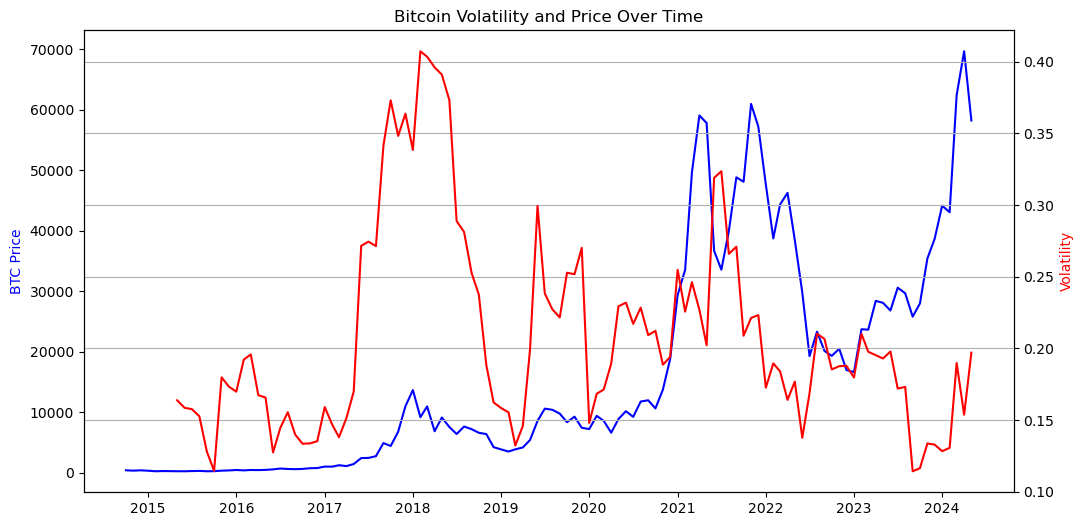

In [26]:
# Plot della volatilità e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Volatility'], label='Volatility (9-Day Rolling Std)', color='red')
plt.ylabel('Volatility', color='red')
plt.title('Bitcoin Volatility and Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


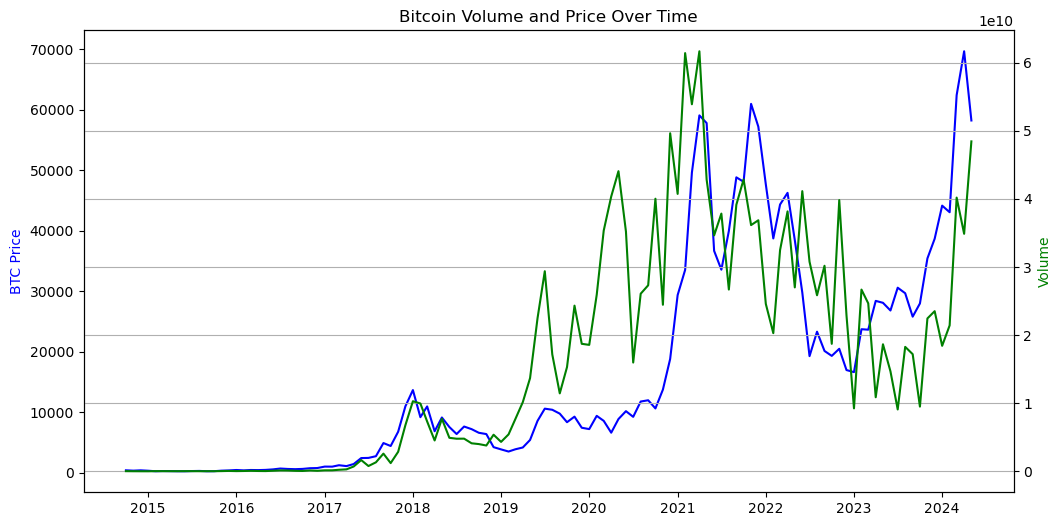

In [8]:
# Plot dei volumi e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Volume'], label='Volume', color='green')
plt.ylabel('Volume', color='green')
plt.title('Bitcoin Volume and Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


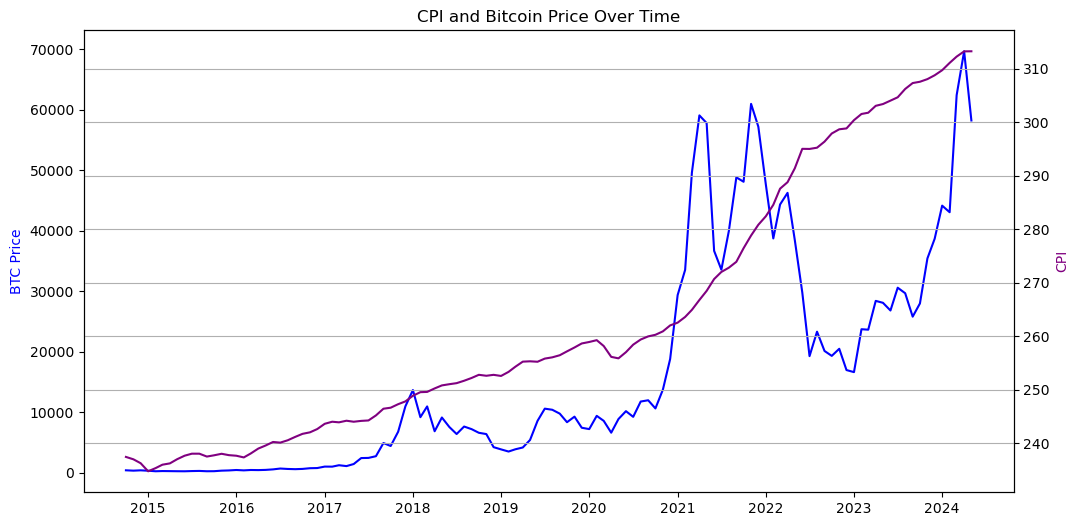

In [9]:
# Plot del CPI e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['CPIAUCSL'], label='CPI', color='purple')
plt.ylabel('CPI', color='purple')
plt.title('CPI and Bitcoin Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [10]:
# Calcolo della correlazione tra i rendimenti giornalieri di Bitcoin e il CPI
correlation = bitcoin_cpi_data['BTC_Daily_Return'].corr(bitcoin_cpi_data['CPIAUCSL'])

print(f'Correlation between Bitcoin daily returns and CPI: {correlation}')


Correlation between Bitcoin daily returns and CPI: -0.07603202670863052
